# Logistic Regression on Bank Data

## Check Whether the client has subscribed a term deposit or not using Logistic regression

#### Import Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Dataset

In [19]:
bank_df = pd.read_csv('bank-full.csv', delimiter = ';')

In [20]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [21]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over each column and extract their dtypes
for col in bank_df.columns:
    # Compare if the dtype is object
    if bank_df[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        bank_df[col]=le.fit_transform(bank_df[col])

# Check that everything has been converted to numeric
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


#### EDA on dataset

In [22]:
# Check first 5 records
bank_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [23]:
# Check last 5 records
bank_df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0
45210,37,2,1,1,0,2971,0,0,0,17,9,361,2,188,11,1,0


In [24]:
# Check for data types, non-null values & memory usage
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [25]:
# Get central tendency, dispersion and shape of dataset’s distribution
bank_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [26]:
# Checking Null values
bank_df.isnull().sum() * 100 / bank_df.shape[0]

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

<font size = 3 color = darkblue>There are no NULL values in the dataset, hence it is clean.</font>

In [27]:
# Check for the column labels of the DataFrame
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [28]:
# Check the dimensions of the DataFrame
bank_df.shape

(45211, 17)

In [29]:
# Check for the random sample from the DataFrame
bank_df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
35953,45,4,0,2,0,2237,1,0,0,8,8,128,3,322,2,0,0
21881,54,1,1,0,0,2584,0,0,0,20,1,387,7,-1,0,3,0
36350,42,1,1,1,0,3068,1,1,0,11,8,429,2,-1,0,3,0
29461,31,4,2,2,0,2915,0,0,0,3,3,211,1,-1,0,3,0
31230,28,4,2,2,0,730,1,0,0,3,7,631,1,-1,0,3,1


#### Visualize data

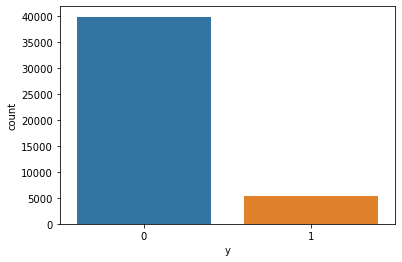

In [30]:
sns.countplot(x = 'y', data = bank_df)

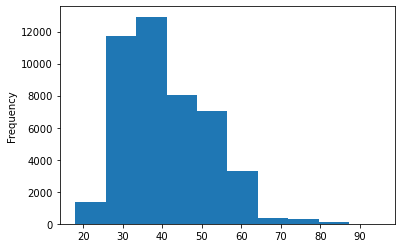

In [31]:
bank_df['age'].plot.hist()

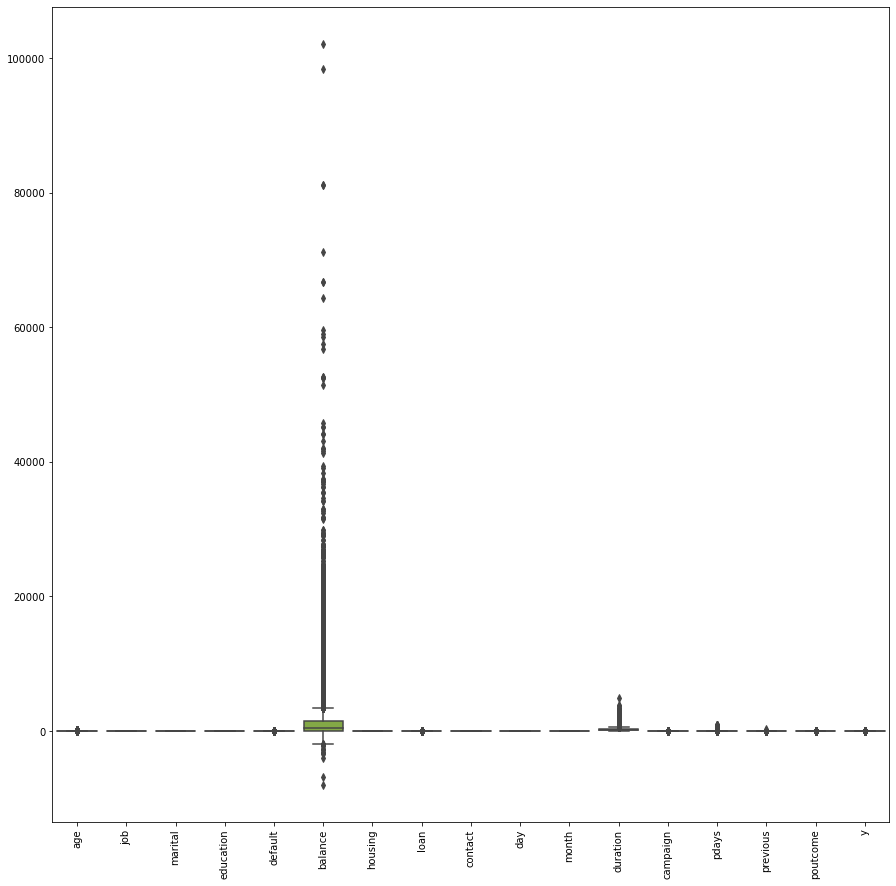

In [32]:
plt.figure(figsize = (15, 15))
sns.boxplot(data = bank_df)
plt.xticks(rotation ='vertical')
plt.show()

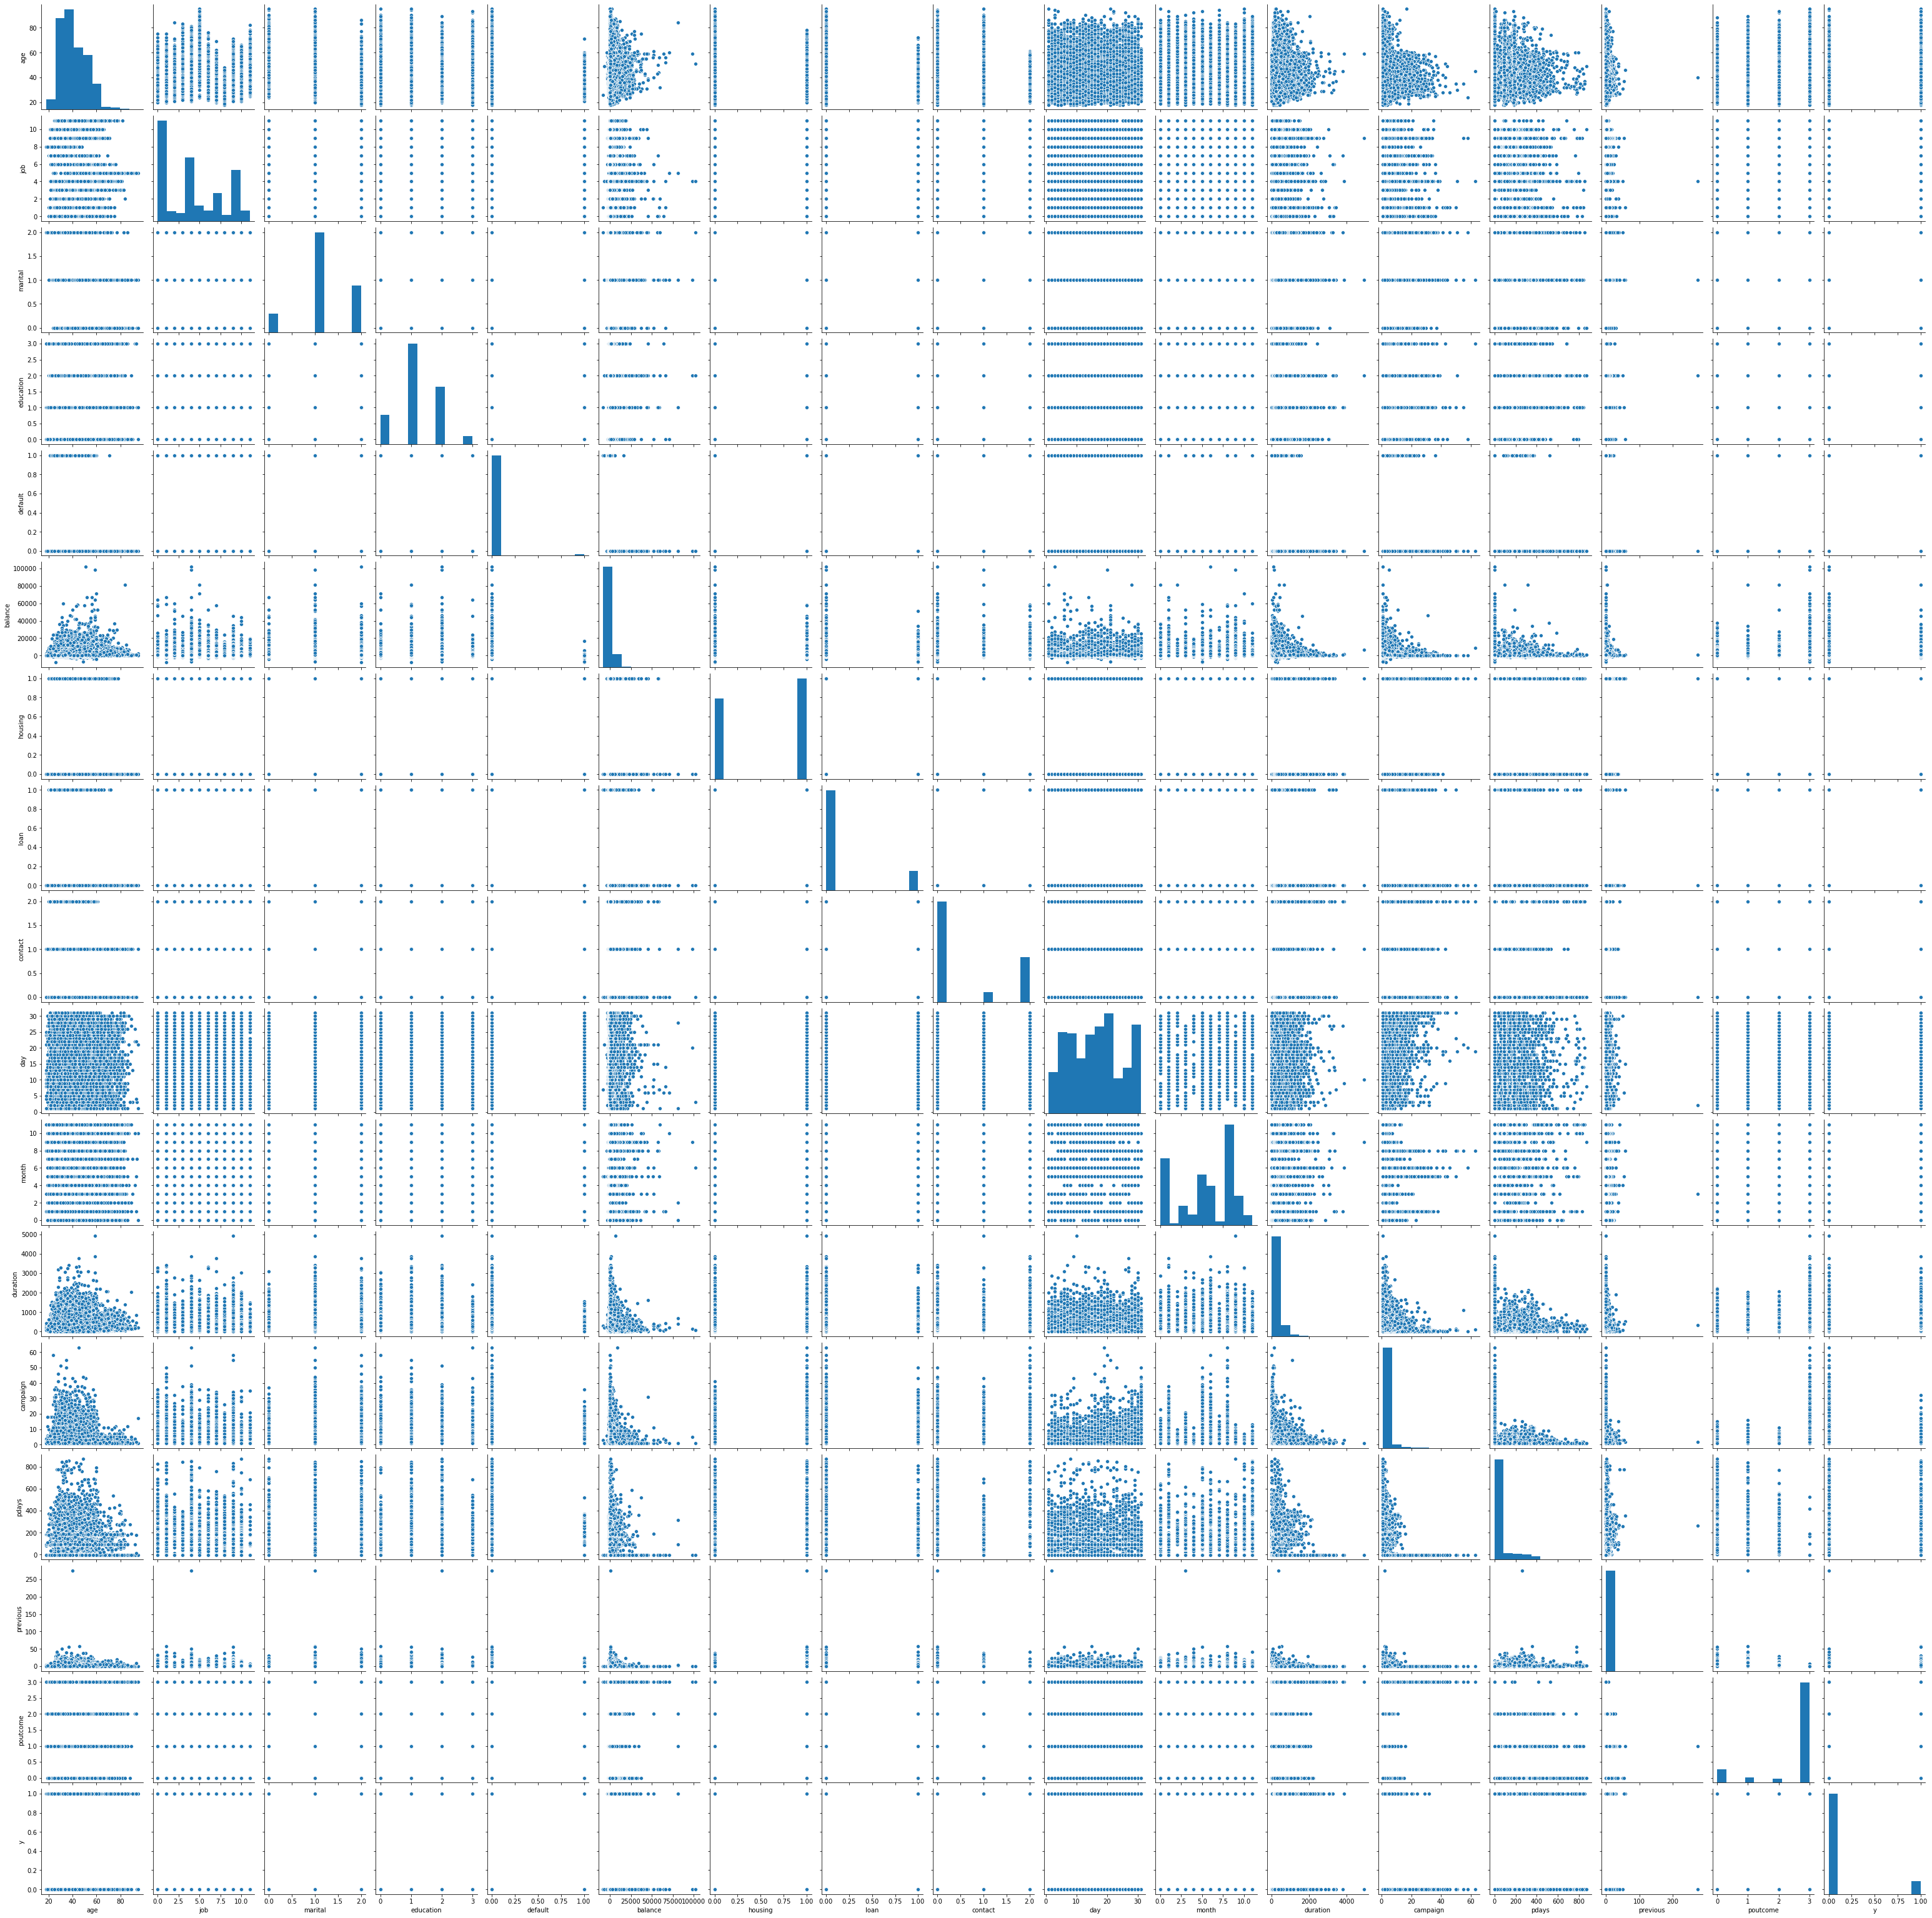

In [33]:
sns.pairplot(bank_df)

In [34]:
# Put Card column in Y and other columns in the X
X = bank_df.iloc[:, 0:15]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0


In [35]:
Y = bank_df.iloc[:, 16]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 123)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logreg = LogisticRegression(solver = 'lbfgs', class_weight = 'balanced', max_iter = 1500)

In [40]:
logreg.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(class_weight='balanced', max_iter=1500)

In [41]:
Y_predictions = logreg.predict(X_test)
Y_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [42]:
logreg.coef_

array([[-7.04102758e-03, -1.46371637e-03, -2.59258521e-02,
         1.25352391e-01, -7.87783791e-02,  3.05658334e-05,
        -1.34263040e+00, -6.27200148e-01, -6.50581322e-01,
        -9.06777905e-03,  2.20131777e-02,  5.23648069e-03,
        -1.67417554e-01,  1.88213757e-03,  1.35186326e-01]])

In [43]:
logreg.intercept_

array([-0.47914523])

In [44]:
prob_data = logreg.predict_proba(X)
prob_data

array([[0.87199372, 0.12800628],
       [0.93209686, 0.06790314],
       [0.97143224, 0.02856776],
       ...,
       [0.00581804, 0.99418196],
       [0.34981287, 0.65018713],
       [0.05274801, 0.94725199]])

In [45]:
Y_Predict = logreg.predict(X_test)
Y_Predict

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
Y_Prob = pd.DataFrame(prob_data)
Y_Prob

,0,1
0,0.871994,0.128006
1,0.932097,0.067903
2,0.971432,0.028568
3,0.931881,0.068119
4,0.669569,0.330431
...,...,...
45206,0.017049,0.982951
45207,0.238385,0.761615
45208,0.005818,0.994182
45209,0.349813,0.650187


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_mat = confusion_matrix(Y_test, Y_Predict)
confusion_mat

array([[6408, 1578],
       [ 218,  839]], dtype=int64)

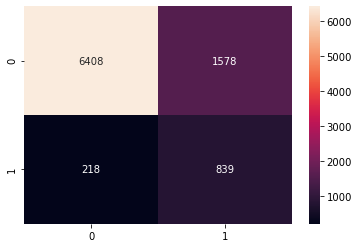

In [49]:
sns.heatmap(confusion_mat, annot = True, fmt = 'g')

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(Y_test, Y_Predict)

0.8013933429171735